 # Práctica de aprendizaje automático (parte 4)

# Preparar un modelo de aprendizaje automático para explotación (3 puntos)

Una vez finalizado tus estudios de grado, estás planeando emprender con tu propia startup. Estás considerando tres sectores en los cuales podrías desarrollar un modelo de aprendizaje automático que te permitiría establecer tu empresa en ese ámbito. Los sectores que tienes en mente son:

 - Predicción de las calificaciones ESRB para videojuegos.
 - Predicción de la experiencia de los usuarios de gimnasios.
 - Predicción de adopción de mascotas.

Para ello, se te proporcionan tres conjuntos de datos etiquetados (en la carpeta `data/`) que corresponden a cada sector:

 - pet_adoption_construccion.csv
 - gym_members_expertise_construccion.csv
 - videogame_esrb_ratings_construccion.csv

Tu tarea es entrenar un modelo de aprendizaje automático utilizando **uno** de los datasets proporcionados. Aplica tus conocimientos adquiridos en esta práctica para obtener el mejor modelo posible. 

Una vez que hayas finalizado el modelo, deberás utilizarlo para clasificar los datos del conjunto de explotación correspondiente al dataset elegido. Estos datasets de explotación son similares a los de construcción, pero **la columna de la clase solo tiene NaNs**.

Los conjuntos de datos de explotación (en la carpeta `data/`) son:

 - pet_adoption_explotacion.csv
 - gym_members_expertise_explotacion.csv
 - videogame_esrb_ratings_explotacion.csv

Utilizando el dataset de explotación debes construir un fichero de predicciones. Junto a este notebook debes entregar este fichero. Guarda el fichero de predicciones generado en la carpeta `predicciones/`. Los posibles nombres para este fichero son:

 - pet_adoption_predicciones.csv
 - gym_members_expertise_predicciones.csv
 - videogame_esrb_ratings_predicciones.csv

El nombre de tu fichero dependerá del dataset elegido. **Atención: si se entrega un fichero de predicciones incorrecto no se podrá evaluar**. El fichero a entregar debe tener dos columnas: el ID del ítem ("`id`") y la predicción para ese ítem ("`prediccion`"). Los ficheros de la carpeta `predicciones/`:

 - pet_adoption_ejemplo_fichero_predicciones.csv
 - gym_members_expertise_ejemplo_fichero_predicciones.csv
 - videogame_esrb_ratings_ejemplo_fichero_predicciones.csv

son ejemplos que ya tienen el formato solicitado para el archivo de entrega. Recuerda que el fichero de predicciones entregado debe acabar en **_predicciones.csv** y no en **_ejemplo_fichero_predicciones.csv**.

Recuerda explicar detalladamente los pasos que has seguido, las decisiones que has tomado y las conclusiones obtenidas. Se recomienda el uso de gráficos y tablas para respaldar tus argumentos y resultados (**recuerda incluir las barras de error en las gráficas y el error estándar en las tablas**).

Puedes encontrar información sobre cada dataset en los siguientes archivos (en la carpeta `data/`):

 - pet_adoption_info.txt
 - gym_members_expertise_info.txt
 - videogame_esrb_ratings_info.txt

**Importante**: Debes utilizar uno de los clasificadores con los que se ha trabajado en los apartados previos de la práctica. No está permitido utilizar otros clasificadores ni modelos de paquetes diferentes a **scikit-learn** (sklearn).

**Importante**: Solo se debe entregar un único archivo con todas las predicciones. Si se entregan varios archivos de predicciones para diferentes conjuntos de datos, el corrector automático seleccionará uno al azar. Esto significa que podríais perder toda la puntuación asociada a las predicciones si el archivo elegido no es el correcto Por ello, entregad un único archivo con predicciones.

En cumplimiento con el REGLAMENTO DE EVALUACIÓN ACADÉMICA DE LA ESCUELA POLITÉCNICA SUPERIOR DE LA UNIVERSIDAD DE AUTÓNOMA DE MADRID, artículo 14; "En el caso de copia, la asignatura se puntuará en la convocatoria donde se produjo la copia con cero puntos. Como medida adicional, el profesor puede iniciar un expediente informativo, de acuerdo con el Reglamento de Evaluación de la UAM".

In [30]:
import pandas as pd

In [31]:
datos_construccion = pd.read_csv("./data/videogame_esrb_ratings_construccion.csv")
datos_explotacion  = pd.read_csv("./data/videogame_esrb_ratings_explotacion.csv")

In [4]:
datos_construccion.columns

Index(['id', 'alcohol_reference', 'blood_or_gore', 'cartoon_violence',
       'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence',
       'language', 'lyrics', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors',
       'sexual_content', 'sexual_themes', 'simulated_gambling',
       'strong_janguage', 'strong_sexual_content', 'suggestive_themes',
       'violence', 'ESRB_Rating'],
      dtype='object')

In [5]:
datos_explotacion.columns

Index(['id', 'alcohol_reference', 'blood_or_gore', 'cartoon_violence',
       'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence',
       'language', 'lyrics', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors',
       'sexual_content', 'sexual_themes', 'simulated_gambling',
       'strong_janguage', 'strong_sexual_content', 'suggestive_themes',
       'violence', 'ESRB_Rating'],
      dtype='object')

In [7]:
# Ratings posibles
print(set(datos_construccion["ESRB_Rating"]))

{0, 1, 2, 3}


In [8]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["ESRB_Rating"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [11]:
print(datos_construccion.shape)
datos_construccion.describe()


(1451, 26)


,id,alcohol_reference,blood_or_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,...,mild_violence,no_descriptors,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,violence,ESRB_Rating
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,100872.749139,0.036527,0.353549,0.019986,0.056513,0.028946,0.216402,0.113715,0.099931,0.032391,...,0.043418,0.178498,0.035148,0.056513,0.066161,0.110958,0.035837,0.119228,0.064094,1.590627
std,493.014082,0.187661,0.478236,0.140001,0.230989,0.167711,0.411934,0.317574,0.300011,0.177098,...,0.203867,0.383063,0.184218,0.230989,0.248649,0.314188,0.185949,0.324168,0.245004,1.017377
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100452.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,100877.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,101298.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,101727.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
# Construimos la matriz de características y el vector objetivo
features = list(datos_construccion.columns)
features.remove("ESRB_Rating")
features.remove("id")

X = datos_construccion[features].values
y = datos_construccion["ESRB_Rating"].values

print(f"Nº Features: {len(features)} Rows of data: {datos_construccion.shape[0]}")

Nº Features: 24 Rows of data: 1451


Tenemos un conjunto de datos binarios con 24 variables independientes y 1451 filas de datos.
A continuación vamos a probar distintos modelos vistos en el ejercicio anterior y discutiremos cual es el más adecuado para este conjunto de datos.

## K-Vecinos

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,kNN 1,0.821529,0.023182,0.178471
1,kNN 2,0.771191,0.027647,0.228809
2,kNN 3,0.809124,0.020913,0.190876
3,kNN 4,0.787752,0.018064,0.212248
4,kNN 5,0.802913,0.013208,0.197087
5,kNN 10,0.798061,0.018671,0.201939
6,kNN 15,0.788420,0.007134,0.211580
7,kNN 20,0.773973,0.022550,0.226027
8,kNN 50,0.773255,0.015546,0.226745
9,kNN 100,0.736059,0.018609,0.263941


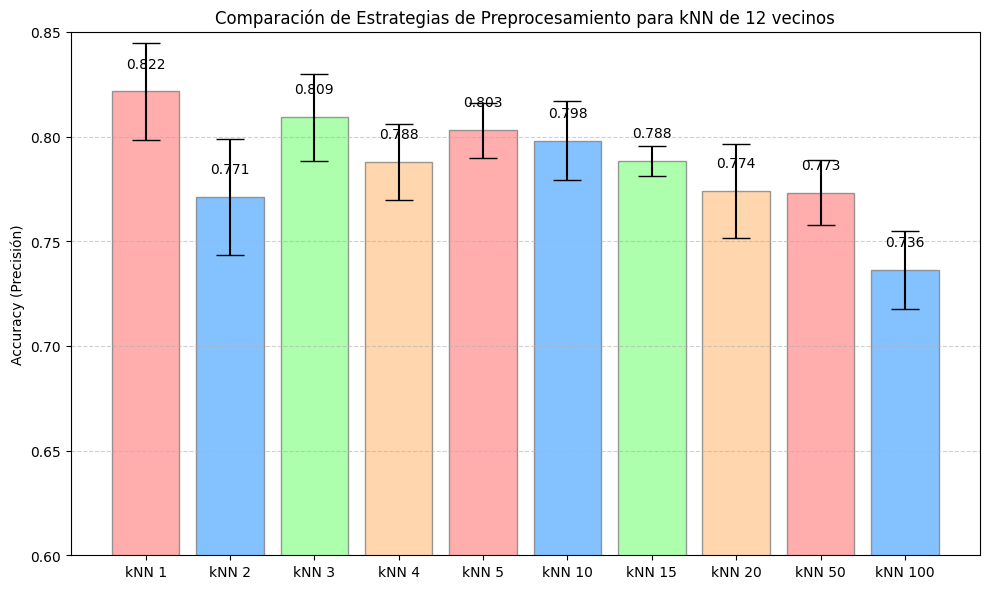

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# En el ejercicio anterior hemos comprobado que el mejor método para utililizar kNN es estandarizar los datos
# de esta manera, todos están a la misma distancia relativa.

# Variamos el número de vecinos y elegimos el que más porcentaje de acierto consigue

classifiers = []

for neighbours in [1, 2, 3, 4, 5, 10, 15, 20, 50, 100]:
    classifiers.append((f"kNN {neighbours}", Pipeline([('scaler', StandardScaler()),('model', KNeighborsClassifier(n_neighbors = neighbours))])))

results_mean = []
results_std = []
names = []
results = []

for name, classifier in classifiers:

    scores = cross_val_score(classifier, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title('Comparación de Estrategias de Preprocesamiento para kNN de 12 vecinos')
plt.ylim(0.6, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas de valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()


Podemos concluir que con la búsqueda de los k-vecinos más proximos conseguimos un acierto máximo de un 82% (1 vecino).

# Arboles de profundidad
En el ejercicio anterior hemos visto que los arboles de decision son invariantes a transformaciones monótonas, por lo tanto haremos nuestro estudio sin preprocesamiento, también hemos probado a hacer una selección de atributos. Hemos ejecutado todas las combinaciones y observado cuales tienen más porcentaje de aciertos.

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif


# Variamos la profundidad y el número de atributos a seleccionar

classifiers = []

for depth in [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 45, 50, 100, 120, 140]:
    for features in [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]:
        classifiers.append((f"profundidad: {depth}, atributos: {features}", Pipeline([('selector', SelectKBest(f_classif, k=features)),('model', DecisionTreeClassifier(max_depth=depth))])))

results = []

for name, classifier in classifiers:

    scores = cross_val_score(classifier, X, y, cv=5)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 

df = pd.DataFrame(results)
df = df.sort_values(by = "Precisión media", ascending = False)
display(df)

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
175,"profundidad: 45, atributos: 24",0.851136,0.012032,0.148864
207,"profundidad: 100, atributos: 24",0.851136,0.012032,0.148864
127,"profundidad: 20, atributos: 24",0.851136,0.012032,0.148864
191,"profundidad: 50, atributos: 24",0.850447,0.012841,0.149553
239,"profundidad: 140, atributos: 24",0.849762,0.012219,0.150238
...,...,...,...,...
6,"profundidad: 1, atributos: 8",0.457649,0.045071,0.542351
1,"profundidad: 1, atributos: 3",0.457649,0.045071,0.542351
3,"profundidad: 1, atributos: 5",0.457649,0.045071,0.542351
12,"profundidad: 1, atributos: 18",0.457649,0.045071,0.542351


Podemos observar que alcanzamos una precisión media de un 85% de aciertos con árboles de profundidad mayor de 20 y con todos los atributos.

## Redes neuronales 
Vamos a probar distintas configuraciones de redes neuronales para determinar cual es la óptima, para ello, distintas funciones de preprocesamiento, distintos números de neuronas, capas, funciones de activación, optimizadores, valor de regulación y ratio de aprendizaje.

Utilizaremos `GridSearchCV` para ejecutar todas las combinaciones

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

p_grid = {
    # Arquitecturas:
    'hidden_layer_sizes': [(30,), (30, 30), (50,), (100,), (50, 50), (100, 50, 25)],
    
    # Activación:
    # 'relu': Rectified Linear Unit
    # 'tanh': Tangente hiperbólica (clásica)
    'activation': ['relu', 'tanh'],
    
    # Solver (Algoritmo de aprendizaje):
    # 'adam': Bueno para datos grandes/medios, muy rápido.
    # 'sgd': Stochastic Gradient Descent (a veces encuentra mínimos más generales)
    'solver': ['adam', 'sgd'],
    
    # Regularización L2 (Alpha):
    # Valores bajos (0.0001): El modelo se ajusta mucho a los datos
    # Valores altos (0.01, 0.1): El modelo es más simple (evita overfitting)
    'alpha': [0.0001, 0.01, 0.1],
    
    'learning_rate': ['constant', 'adaptive']
}

model1 = MLPClassifier(max_iter=2000, random_state=13)
model2 = Pipeline([('scaler', RobustScaler()), ('model', MLPClassifier(max_iter=2000, random_state=13))])
model3 = Pipeline([('scaler', StandardScaler()), ('model', MLPClassifier(max_iter=2000, random_state=13))])

clf = GridSearchCV(model1, p_grid, n_jobs=-1, cv=5)

clf.fit(X, y)

print("Mejor combinación de parámetros encontrada:")
print(clf.best_params_)
print(f"Mejor precisión obtenida: {clf.best_score_:.2f}")



Mejor combinación de parámetros encontrada:
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Mejor precisión obtenida: 0.86


Mejor precisión obtenida: 0.86


In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

p_grid = {
    # Arquitecturas:
    'model__hidden_layer_sizes': [(30,), (30, 30), (50,), (100,), (50, 50), (100, 50, 25)],
    
    # Activación:
    # 'relu': Rectified Linear Unit
    # 'tanh': Tangente hiperbólica (clásica)
    'model__activation': ['relu', 'tanh'],
    
    # Solver (Algoritmo de aprendizaje):
    # 'adam': Bueno para datos grandes/medios, muy rápido.
    # 'sgd': Stochastic Gradient Descent (a veces encuentra mínimos más generales)
    'model__solver': ['adam', 'sgd'],
    
    # Regularización L2 (Alpha):
    # Valores bajos (0.0001): El modelo se ajusta mucho a los datos
    # Valores altos (0.01, 0.1): El modelo es más simple (evita overfitting)
    'model__alpha': [0.0001, 0.01, 0.1],
    
    'model__learning_rate': ['constant', 'adaptive']
}

model2 = Pipeline([('scaler', RobustScaler()), ('model', MLPClassifier(max_iter=2000, random_state=13))])
model3 = Pipeline([('scaler', StandardScaler()), ('model', MLPClassifier(max_iter=2000, random_state=13))])

clf = GridSearchCV(model2, p_grid, n_jobs=-1, cv=5)

clf.fit(X, y)

print("Mejor combinación de parámetros encontrada (robust scaler):")
print(clf.best_params_)
print(f"Mejor precisión obtenida (robust scaler): {clf.best_score_:.2f}")

clf = GridSearchCV(model3, p_grid, n_jobs=-1, cv=5)

clf.fit(X, y)

print("Mejor combinación de parámetros encontrada (standard scaler):")
print(clf.best_params_)
print(f"Mejor precisión obtenida (standard scaler): {clf.best_score_:.2f}")



Mejor combinación de parámetros encontrada (robust scaler):
{'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (50, 50), 'model__learning_rate': 'constant', 'model__solver': 'adam'}
Mejor precisión obtenida (robust scaler): 0.86
Mejor combinación de parámetros encontrada (standard scaler):
{'model__activation': 'tanh', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50, 50), 'model__learning_rate': 'constant', 'model__solver': 'sgd'}
Mejor precisión obtenida (standard scaler): 0.87


De todos los modelos probados anteriormente, el elegido es la red neuronal bicapa de 50 neuronas cada una con estandarización de los datos, función de activación tangente hiperbólica, parámetro alpha 0.0001, ratio de aprendizaje constante y algortimo de aprendizaje `sgd`.
El porcentaje de aciertos obtenido en la validación cruzada es de un 87%.

Con este modelo hemos obtenido un porcentaje de acierto de un 87% sobre 4 valores posibles a predecir, por lo tanto creemos que es suficiente para predecir los datos de explotación.

In [52]:
# Construimos la matriz de características y el vector objetivo
features = list(datos_construccion.columns)
features.remove("ESRB_Rating")
features.remove("id")

X_train = datos_construccion[features].values
y_train = datos_construccion["ESRB_Rating"].values

id_predict = datos_explotacion["id"].values
X_predict = datos_explotacion[features].values


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from statistics import mean

# Modelo elegido
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(50,50), max_iter=2000, random_state=13, learning_rate="constant", activation="tanh", alpha=0.0001, solver="sgd"))
])

model.fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train) * 100:.2f}%")
predictions_probabilities = model.predict_proba(X_predict)
predictions = model.predict(X_predict)

print(f"Average confidence: {mean([max(prediction) for prediction in predictions_probabilities]) * 100:.2f}%")



Training score: 89.04%
Average confidence: 87.08%


Hemos entrenado el modelo elegido con los datos de entrenamiento y hemos predecido los valores sobre los datos de explotación. Podemos afirmar, con un 87% de convicción de que los valores predecidos son verdaderos.

In [62]:
# Save the predictions
data = {
    "id": id_predict,
    "prediccion": predictions,
}

dataframe = pd.DataFrame(data)
dataframe.to_csv("predicciones/videogame_esrb_ratings_explotacion.csv", index = False)